<a href="https://colab.research.google.com/github/waterbean0403/TIL/blob/main/06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
"""# 주성분 분석"""

"""## PCA 클래스"""

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-08-01 00:27:51--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-08-01 00:27:51--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-08-01 00:27:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
from sklearn.decomposition import PCA     # sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘 제공

pca = PCA(n_components=50)     # 객체 생성 시, n_components 매개변수에 주성분의 개수 지정
pca.fit(fruits_2d)     # k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않음

PCA(n_components=50)

In [6]:
print(pca.components_.shape)     # PCA 클래스가 찾은 주성분. 이 배열의 크기

# n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50. 즉 50개의 주성분

(50, 10000)


In [10]:
# 06_2의 draw_fruits() 함수

import matplotlib.pyplot as plt

# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위한 간단한 유틸리티 함수 draw_fruits()

def draw_fruits(arr, ratio=1):
  n = len(arr)     # n은 샘플 개수
  # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:     # n개까지만 그림
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

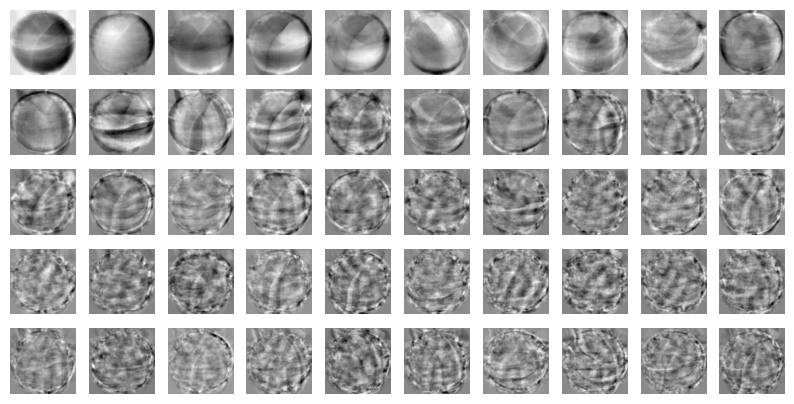

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각

In [12]:
print(fruits_2d.shape)

(300, 10000)


In [13]:
fruits_pca = pca.transform(fruits_2d)     # 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환
print(fruits_pca.shape)

# 이제 fruits_pca 배열은 50개의 특성을 가진 데이터

(300, 50)


In [14]:
"""## 원본 데이터 재구성"""

fruits_inverse = pca.inverse_transform(fruits_pca)     # PCA 클래스는 원본 데이터를 복원하기 위해 inverse_transform() 메서드 제공
print(fruits_inverse.shape)

(300, 10000)


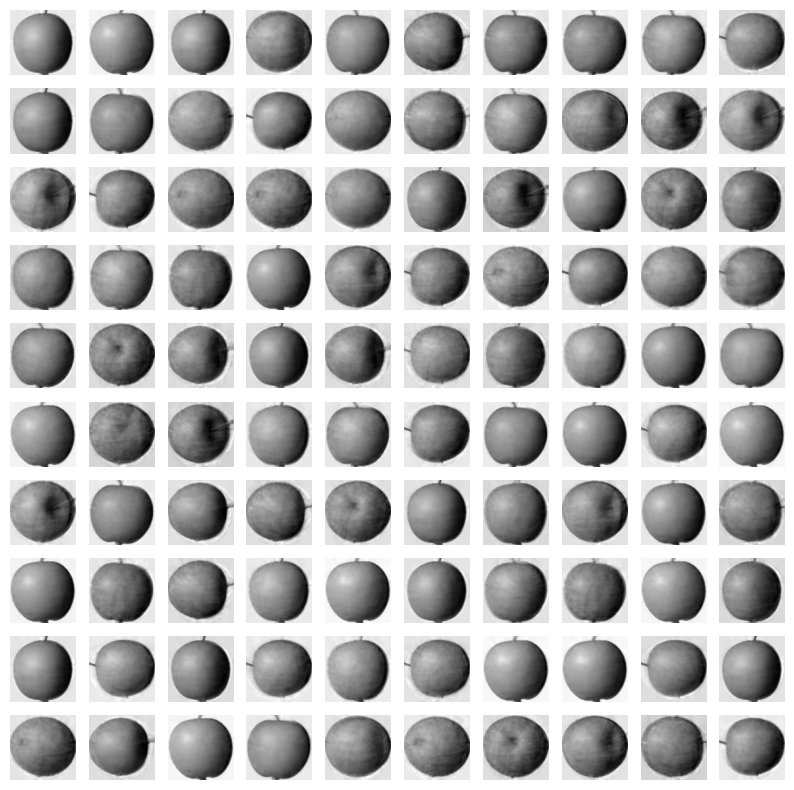

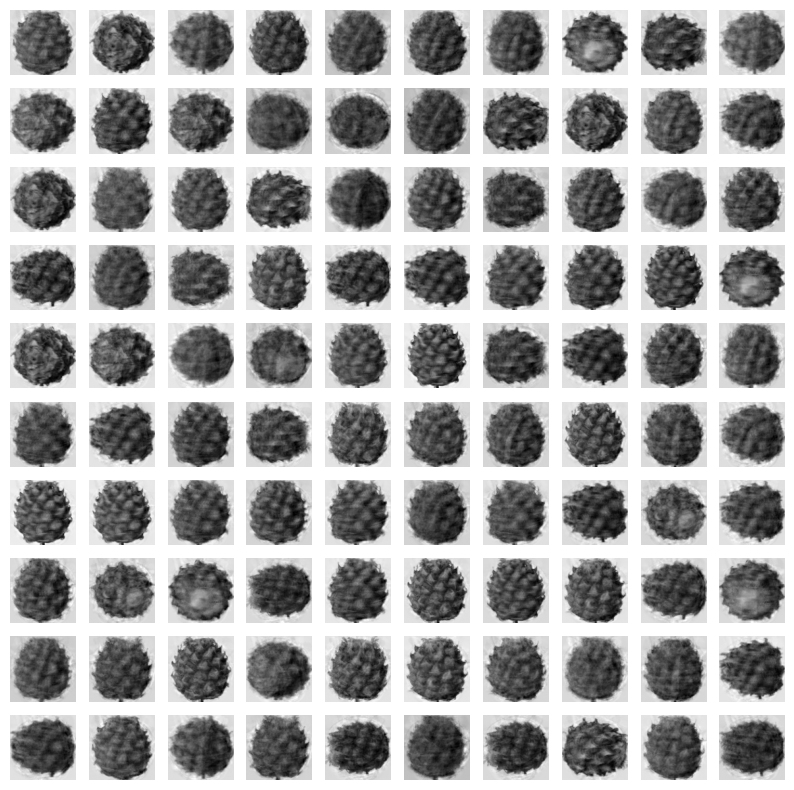

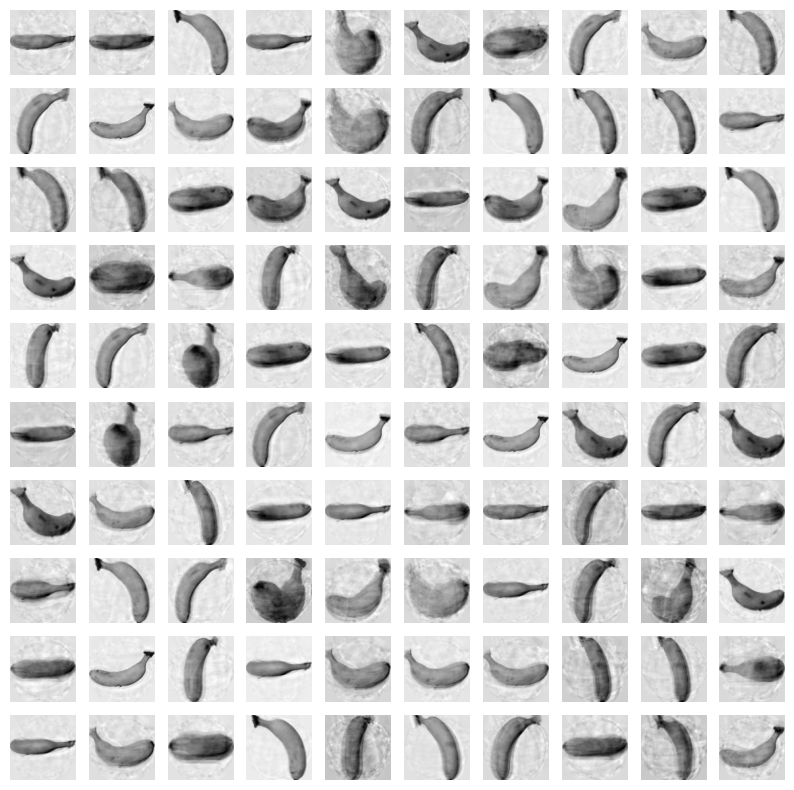

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [16]:
"""## 설명된 분산"""

print(np.sum(pca.explained_variance_ratio_))     # PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록

# 92%가 넘는 분산 유지

0.9215045112512049


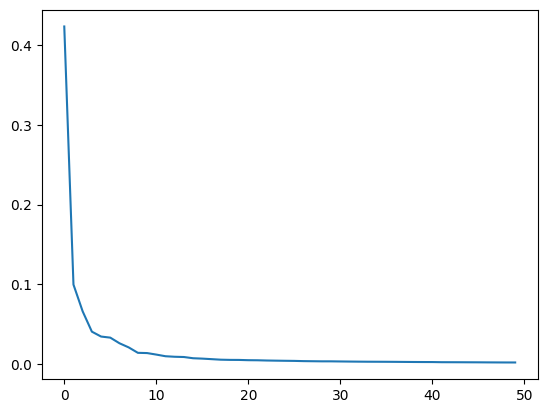

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현. 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음

In [18]:
"""## 다른 알고리즘과 함께 사용하기"""

# 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아봄

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [19]:
target = np.array([0]*100 + [1]*100 + [2]*100)     # 지도 학습 모델을 사용하려면 타깃값이 있어야 하므로 사과를 0, 파인애플을 1, 바나나를 2로 지정

In [20]:
from sklearn.model_selection import cross_validate     # 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증 수행

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 교차 검증의 점수는 0.997 정도로 매우 높음. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉬움.
# cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록

0.9966666666666667
1.759699296951294


In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 50개의 특성만 사용했는데도 정확도가 100%이고 훈련 시간 또한 감소
# PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

0.9966666666666667
0.038762664794921874


In [23]:
# 앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정. 이 대신 원하는 설명된 분산의 비율을 입력할 수 있음

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [24]:
print(pca.n_components_)

# 단 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음

2


In [25]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)가 됨

(300, 2)


In [26]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성을 사용했을 뿐인데 99%의 정확도 달성

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.28131966590881347


In [27]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아봄

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


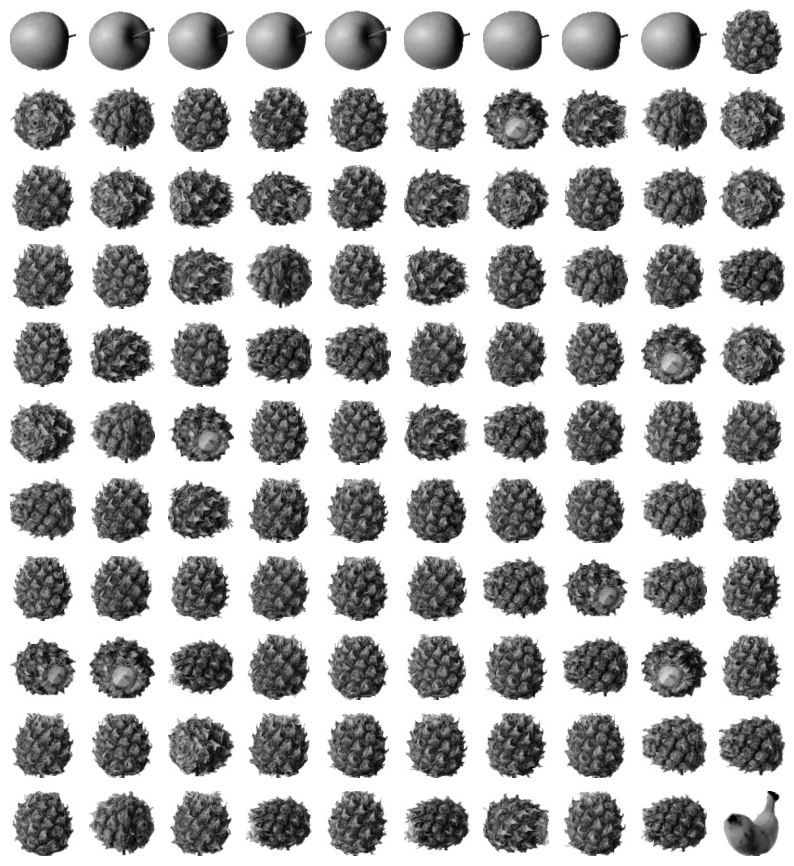

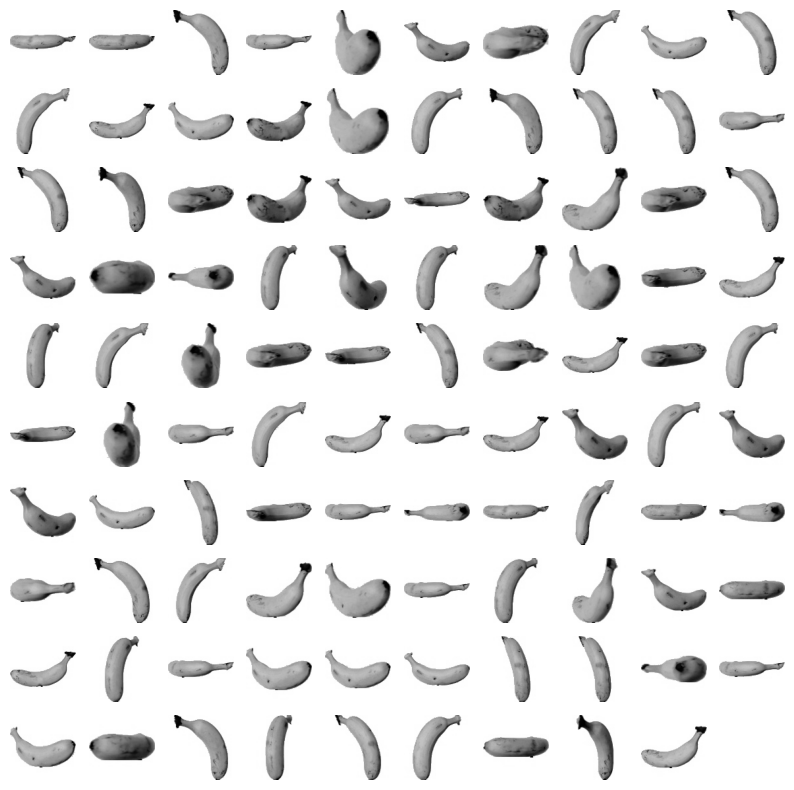

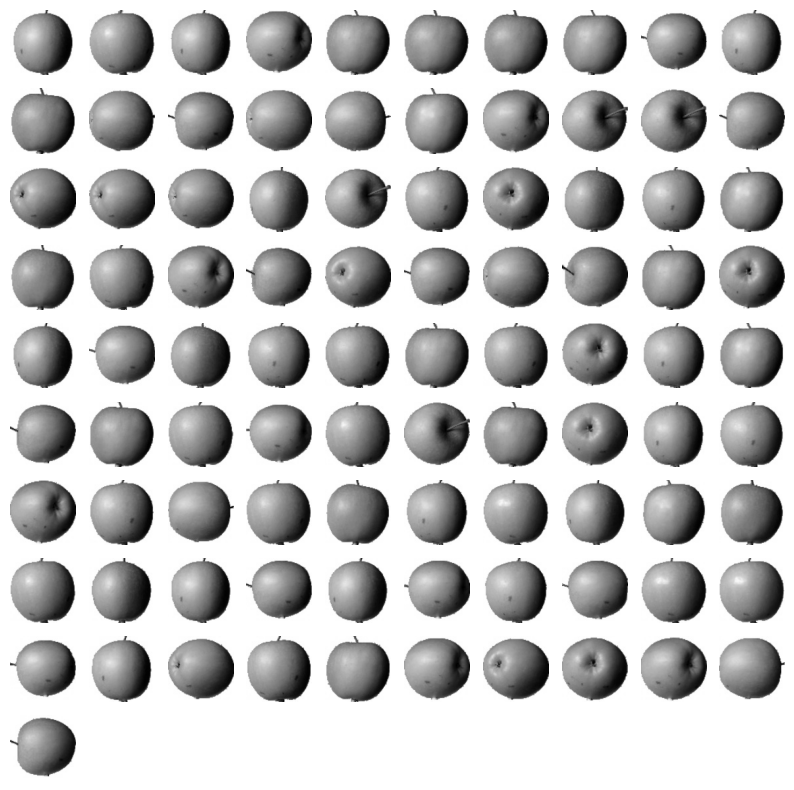

In [28]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

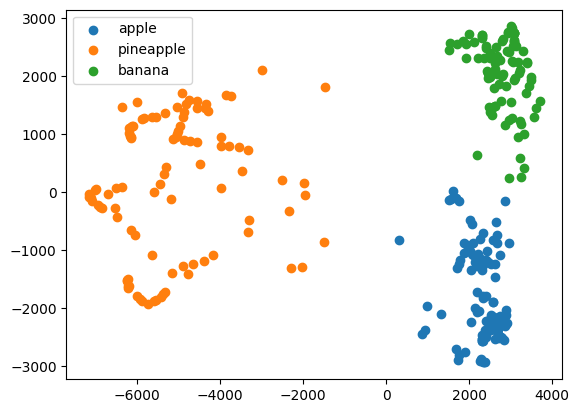

In [29]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

# 이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있으므로 이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬움